In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import statistics
from scipy.interpolate import UnivariateSpline

In [5]:
all_df = pd.read_pickle('./data/all-results.pkl')
%matplotlib notebook

In [7]:
investing_df = all_df[all_df.subreddit=='investing']

In [53]:
wallstreetbets_df = all_df[all_df.subreddit=='wallstreetbets']

In [44]:
def calculate_to_plot(df):
    to_plot = []
    vals = []
    time = calendar.timegm(datetime.datetime(2018, 12, 2).utctimetuple())
    step = 500
    for index, x in df.iterrows():
        if x.created_utc < time:
            vals += x.score*[x.sentiment]
        else:
            to_plot += [(time, statistics.mean(vals),datetime.date.fromtimestamp(time).strftime("%m/%d"))]
            time += 24*60*60
            vals = [x.sentiment]
    to_plot += [(time, statistics.mean(vals),datetime.date.fromtimestamp(time).strftime("%m/%d"))]
    return to_plot

In [50]:
investing_plot = calculate_to_plot(investing_df)

In [54]:
wallstreetbets_plot = calculate_to_plot(wallstreetbets_df)

In [61]:
new_all_df = all_df.sort_values('created_utc', ascending=True)
all_plot = calculate_to_plot(new_all_df)

<IPython.core.display.Javascript object>


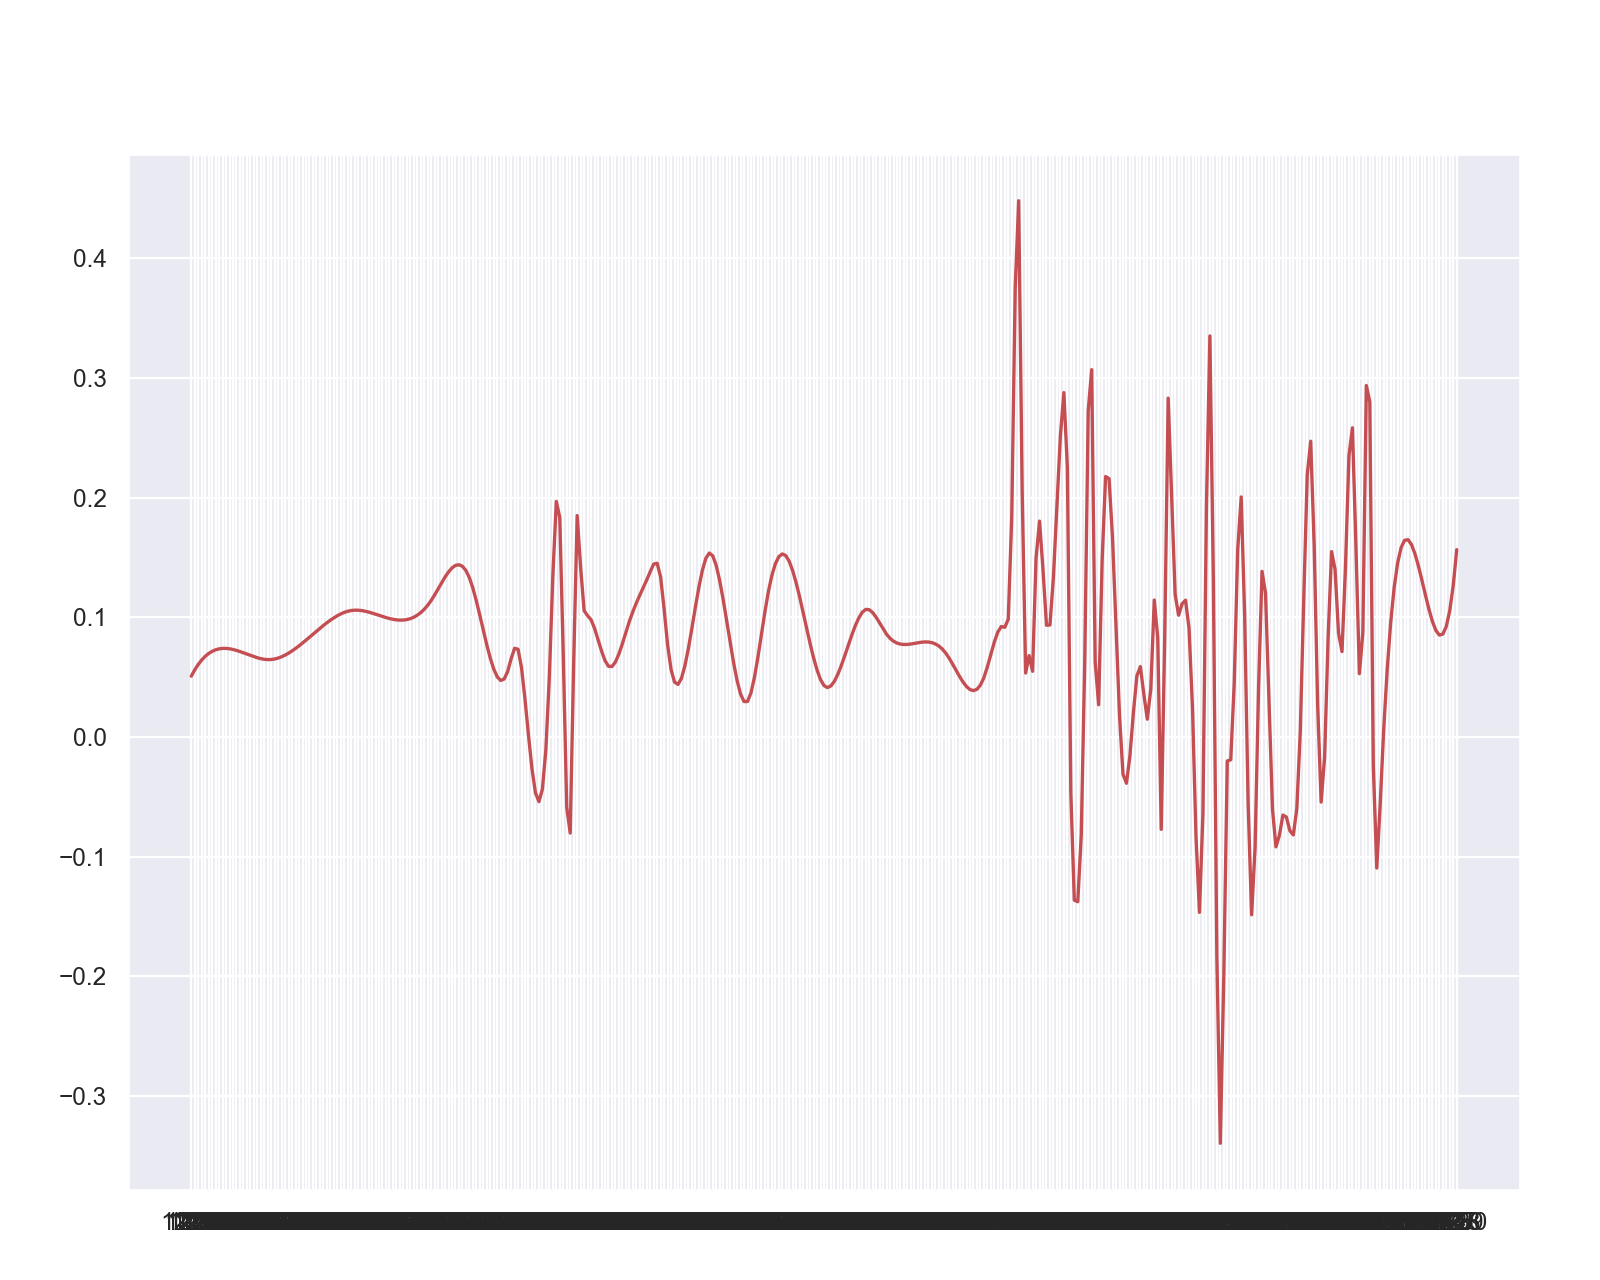

In [64]:
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(10,8)})

s = UnivariateSpline([x[0] for x in investing_plot], [x[1] for x in investing_plot], s=3)
xs = [x[0] for x in investing_plot]
ys = s(xs)
xs = [x[2] for x in investing_plot]

to_plot_df = pd.DataFrame(list(zip([x[2] for x in to_plot], [x[1] for x in to_plot])), columns =['date', 'sentiment']) 
to_plot_df = pd.DataFrame(list(zip(xs, ys)), columns =['date', 'sentiment'])
to_plot_df.plot(x='date',y='sentiment',c='r')

plt.plot(xs,ys,c='b')

s = UnivariateSpline([x[0] for x in wallstreetbets_plot], [x[1] for x in wallstreetbets_plot], s=3)
xs = [x[0] for x in wallstreetbets_plot]
ys = s(xs)
xs = [x[2] for x in wallstreetbets_plot]

plt.plot(xs,ys,c='r')

# to_plot_df = pd.DataFrame(list(zip(xs, ys)), columns =['date', 'sentiment'])
# to_plot_df.plot(x='date',y='sentiment',c='b')

s = UnivariateSpline([x[0] for x in all_plot], [x[1] for x in all_plot], s=3)
xs = [x[0] for x in all_plot]
ys = s(xs)
xs = [x[2] for x in all_plot]

plt.plot(xs,ys,c='r')
